In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('./results/training.csv') # Set to log/metrics.csv to monitor a training run
data['dt'] = data['time'].diff()
data['tps'] = data['tokens_processed'].diff()
data

,time,epoch,tokens_processed,effective_batch_number,training_loss,validation_loss,learning_rate,gradient_norm,dt,tps
0,1.722909e+09,0,2.621440e+05,0,10.976952,9.718313,0.000000e+00,1.386880,NaN,NaN
1,1.722909e+09,0,5.242880e+05,1,9.683416,9.718313,7.667452e-07,1.548719,0.843373,262144.0
2,1.722909e+09,0,7.864320e+05,2,9.718723,9.718313,1.533490e-06,1.529454,0.842707,262144.0
3,1.722909e+09,0,1.048576e+06,3,9.681442,9.718313,2.300236e-06,1.546596,0.842305,262144.0
4,1.722909e+09,0,1.310720e+06,4,9.684021,9.718313,3.066981e-06,1.541098,0.847409,262144.0
...,...,...,...,...,...,...,...,...,...,...
33495,1.722938e+09,4,8.780775e+09,33495,3.203611,3.008393,1.200000e-04,0.363065,0.871202,262144.0
33496,1.722938e+09,4,8.781038e+09,33496,3.177295,3.008393,1.200000e-04,0.362963,0.866845,262144.0
33497,1.722938e+09,4,8.781300e+09,33497,3.159350,3.008393,1.200000e-04,0.343079,0.863383,262144.0
33498,1.722938e+09,4,8.781562e+09,33498,3.173012,3.008393,1.200000e-04,0.382848,0.869063,262144.0


In [21]:
tokens_processed = data['tokens_processed'].iloc[-1]
minutes = (data['time'].iloc[-1] - data['time'].iloc[0]) / 60
tps = data['tps'].iloc[-1]

print(f"Proccessed { tokens_processed * 100/ 2e9}% of the dataset")
print(f"Time elapsed: { minutes :.2f} minutes.")
print(f"Rate: { tps / 1e3 :.0f}K tokens per seconds")
print(f"Time per epoch estimate: {  2e9 / tps / 3600 :.2f} hours per epochs")

Proccessed 439.0912% of the dataset
Time elapsed: 484.68 minutes.
Rate: 262K tokens per seconds
Time per epoch estimate: 2.12 hours per epochs


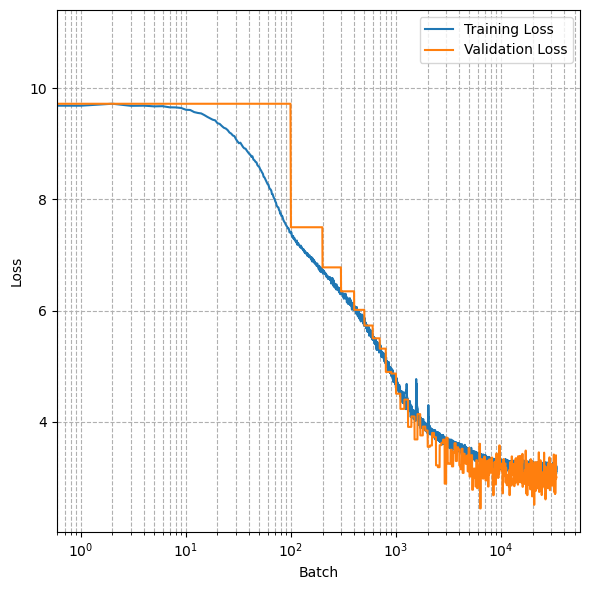

In [23]:
plt.figure(figsize=(6, 6))
plt.plot(data['effective_batch_number'], data['training_loss'], marker=None, label='Training Loss')
plt.plot(data['effective_batch_number'], data['validation_loss'], marker=None, label='Validation Loss')
plt.xscale('log')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()